## Only for Google Colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## List files on drive

In [33]:
!ls '/content/drive/My Drive/assets/'

haarcascade_eye.xml		       smile.jpg
haarcascade_frontalface_default.xml    test-img.jpg
LICENSE				       test-video.mov
shape_predictor_68_face_landmarks.dat


## Test opencv on Google Colab

import cv2
from matplotlib import pyplot as plt

In [5]:
IMG_PATH='/content/drive/My Drive/assets/test-img.jpg'

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread(IMG_PATH)

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

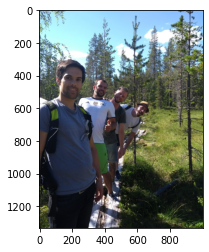

In [10]:
plt.imshow(img)
plt.show()

In [11]:
img.shape

(1333, 1000, 3)

In [12]:
roi = img[300:700,0:900] ## y1,y2:x1:x2

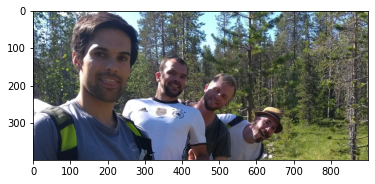

In [13]:
plt.imshow(roi)
plt.show()

In [29]:
VIDEO_PATH = '/content/drive/My Drive/assets/test-video.mov'

In [30]:
# more classifiers can be found under https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/assets/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/My Drive/assets/haarcascade_eye.xml')

In [31]:
from IPython.display import clear_output, Image, display, HTML

cap = cv2.VideoCapture(VIDEO_PATH) # default 0 - use the system camera
while(True):

    clear_output(wait=True)

    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    lines, columns, _ =  frame.shape
    frame = cv2.resize(frame, (int(columns/4), int(lines/4))) 

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 3)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    plt.imshow(frame)
    plt.show()
# When everything done, release the capture
cap.release()

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import clear_output, Image, display, HTML

cap = cv2.VideoCapture(VIDEO_PATH)
while(True):

    clear_output(wait=True)

    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    lines, columns, _ =  frame.shape
    #frame = cv2.resize(frame, (int(columns/4), int(lines/4))) 

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 3)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.imshow(frame)
    plt.show()
# When everything done, release the capture
cap.release()